<hr style="height:2px;border:none"/>
<h1 align='center'> <img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />

INF-395 / 477 / 577 Tarea 2 Redes Neuronales Artificiales - 2020-2 </h1>

<H3 align='center'> Integrantes: Kevin Reyes - Diego Quezada </H3>
<hr style="height:2px;border:none"/>


**Temas**  
* Manipulaciones en tensorflow, keras, pandas y numpy
* Recurrent Neural Networks
* LSTM, GRU
* Autoencoders
* GAN

**Formalidades**  
* Equipos de trabajo de 2 personas (*Ambos estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos). Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno para toda la tarea, con tal de que todos los entregables estén bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_ ( en caso de ser repositorio privado, invitar como colaborador al usuario de github "Aerlio") al correo electrónico del ayudante (*<tomas.ochoa.14@sansano.usm.cl>*), en copia al profesor (*<cvalle@inf.utfsm.cl>*). Especificar el siguiente asunto: [INF395/477/577-2020 Tarea 2]
* Fecha de entrega y presentaciones: 8 de Enero. Hora límite de entrega: 23:00. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail. 

<hr style="height:2px;border:none"/>

La tarea se divide en tres partes:

[1.](#primero) RNNs para series de tiempo  <br>
[2.](#segundo) RNNs para texto <br>
[3.](#tercero) Autoencoders para imágenes <br>
[3.](#cuarto) GANs para imágenes <br>

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo solo son guías y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con comentarios y con celdas _Markdown_ con los comentarios de la pregunta y con cualquier analisis, fórmula o explicación que les parezca relevante para justificar sus procedimientos. 
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará mucho la elección en si, en cambio la argumentación detrás de la elección será lo más ponderado.

**Es ÁLTAMENTE recomendado realizar esta tarea en _Colab_ de Google (https://colab.research.google.com/notebooks/intro.ipynb#recent=true), con el fin de no depender del rendimiento de su computador personal al momento de entrenar redes neuronales y poder compartir de forma fácil sus avances con su compañer@ de trabajo.** Si bien conlleva sus pros y contras utilizar _Colab_ , existirá una curva de aprendizaje personal que lo ayudará a sacar el mayor provecho a esta herramienta, por ejemplo aprendiendo a guardar los avances realizados, evitando tener que ejecutar todo el código cada vez que se abra _Colab_ . *Tip: Una vez abierto un notebook en _Colab_ ir a **entorno de ejecución**->**Cambiar tipo de entorno de ejecución**, y seleccionár TPU como acelerador por hardware para redes recurrentes y GPU para redes convolucionales.*.

In [2]:
import random

# 3. Autoencoders en Fashion MNIST

Si bien las redes neuronales han tenido desempeños sorprendentes en muchas áreas donde antes solo un ser humano podía alcanzar buenos desempeños, uno de sus desventajas suele serla alta dimensionalidad de los espacios de hipótesis. En la práctica, esto implica que para aprender una tarea predictiva con alguna capacidad de generalización, se requieren grandes bases de datos etiquetadas. Esto implica un problema, considerando que al momento de buscar la base de datos, no se tiene a priori una manera de automatizar esta etiquetación. Esta necesidad de gran cantidad de trabajo de clasificación realizado por humanos, ha engendrado soluciones ingeniosas, como la aproximación de _Facebook_ hace algunos años de pedirle a los mismos usuarios que etiquetaran a las personas en sus fotos, o la solución de _Amazon_, _Mechanical Turk_, donde cualquier usuario puede realizar tareas repetitivas de clasificación a cambio de dinero real, o por otro lado cualquier persona puede comprar la etiquetación de una base de datos la cual realizan varias personas en cualquier parte del mundo. 

Otra aproximación, quizás aún más ingeniosa, para solucionar el problema de las etiquetas, es utilizar las bases de datos sin preocuparse de sus etiquetas. Esta aproximación de aprendizaje no supervisado tiene su representante en redes neuronales en los _Autoencoders_, redes que utilizan el mismo input como target y buscan representaciones de menor dimensionalidad al interior de la red. Estas redes han permitido el uso de cantidades masivas de datos para aprender de ellos sin necesidad de tener etiquetas. Durante esta pregunta veremos algunos de los aspectos y posibilidades básicas que nos presentan los _autoencoders_, utilizando una base de datos de imágenes de articulos de vestimenta, el Fashion MNIST. 

## 3.a) Carga de datos y visualizaciones
Cargue los datos. Puede user las funciones de `keras.datasets` como muestra el código o descargarlo manualmente. 

Luego, visualice algunas imagenes de cada una de las catégorias junto con sus nombres (investigue un poco para encontrar la codificación de `y`). Note que las imagenes deben representarse en blanco y negro, puede usar `cmap='Greys'`. ¿Qué pares de categorías cree podrían ocasionar problemas al momento de clasificación? ¿Qué tan bien cree que se desempeñaría un humano en esta tarea?

**Respuesta:** Algunas clases conflictivas podrían ser la clase Sneaker con Ankle boot y Sandal, como así también las clases Pullover con Coat, Shirt y T-shirt. 
Finalmente, T-shirt y dress también podría causar conflictos para diseños específicos.

Para las clases Pullover con Coat, Shirt y T-shirt hay casos complejos en donde la distinción entre estas clases es detallista, si a esto le sumamos
que las imágenes son en blanco y negro creemos que un humano podría sufrir algunos problemas de clasificación para estas clases recién mencionadas, sin embargo para clases como
Trousers y Bag no habría mayor problema.


In [3]:
from keras.datasets import fashion_mnist
(x_tr,y_tr),(x_val,y_val) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
x_tr.shape

(60000, 28, 28)

In [5]:
labels = {
    "0": "T-shirt/top",
    "1": "Trouser",
    "2": "Pullover",
    "3": "Dress",
    "4": "Coat",
    "5": "Sandal",
    "6": "Shirt",
    "7": "Sneaker",
    "8": "Bag",
    "9": "Ankle boot"
}

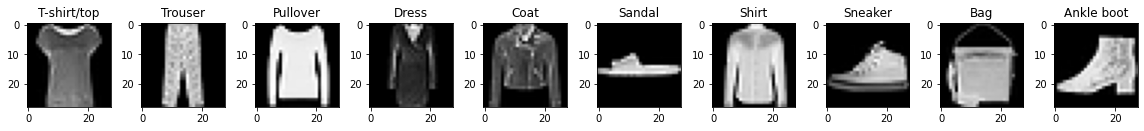

In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"]=[16,4]
fig, axs = plt.subplots(1,10)
for i,ax in enumerate(axs):
  ax.imshow(x_tr[np.where(y_tr==i)][100], cmap = "gray")
  ax.set_title(f'{labels[str(i)]}')
  #if i>=9:
  #  i-=1
  #ax.text(1.5, 2.2, letters[i], bbox={'facecolor': 'white', 'pad': 3},fontsize=30)
plt.tight_layout()
plt.show()

## 3.b Posibilidades de preprocesamiento y pequeños análisis. 

Las primeras redes que entrenaremos utilizarán arquitecturas _fully connected_, por lo cual también es necesario transformar nuestras imagenes 2-dimensionales a vectores, como muestra el ejemplo de código.

**Preguntas:**

i) ¿Cuáles son los rangos de valores de `x`? ¿Por qué?  
Los rangos de valores van desde 0 a 255, donde el 0 indica el color negro y el 255 el color blanco, es una de los estándares para representar pixeles de imágenes en escala de grises.

ii) ¿Las distintas clases de ejemplos están balanceadas?  
Sí, están perfectamente balanceadas, cada clase tiene 6000 ejemplos de entrenamiento.

iii) ¿Considera necesario realizar un preprocesamiento? Escale los valores de `x` al intervalo $[0,1]$, y guarde el conjunto de datos original de igual manera que el escalado. ¿Se pierde información al realizar este preprocesamiento?   
a. Sí, en este tipo de problemas es recomendable llevar los valores de cada pixel a un intervalo de \[0,1\].  
b. Depende de la precisión con que representemos el valor entre 0 a 255 en el intervalo de \[0,1\], si redondeamos o truncamos decimales, estaremos perdiendo información de la data original.

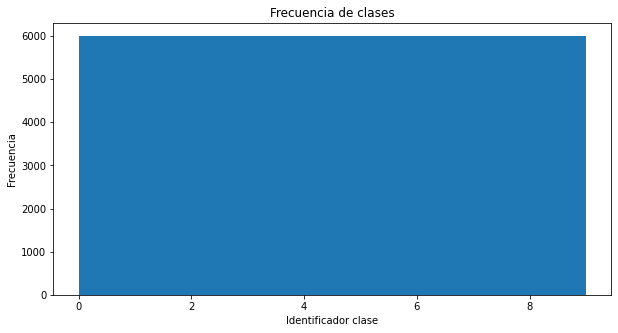

In [7]:
plt.rcParams["figure.figsize"]=[10,5]
plt.hist(y_tr[:], bins=10)
plt.title("Frecuencia de clases")
plt.xlabel("Identificador clase")
plt.ylabel("Frecuencia")
plt.show()

In [8]:
x_tr_vector = x_tr.reshape(-1,28*28)
x_val_vector = x_val.reshape(-1,28*28)

x_tr_vector_scaled = x_tr_vector/255
x_val_vector_scaled = x_val_vector/255
x_tr_scaled = x_tr/255
x_val_scaled = x_val/255


In [9]:
x_val_scaled.shape

(10000, 28, 28)

## 3.c) Primer Autoencoder

Entrenaremos un primer autoencoder de una capa oculta, usando arquitectura densa. Para esto, utilize como guía los códigos presentados abajo. 

Utilice en primera instancia su conjunto de datos escalados. Considerando el intervalo de los datos escalados.

Entrene esta primera red utilizando pérdida _binary cross entropy_. Compare luego las imagenes originales con las imagenes reconstruidas, como muestra el código. **Grafique** como varia la pérdida a lo largo del entrenamiento y visualice algunas imagenes reconstruidas. 

**Preguntas:**

i) ¿Qué función de activación correspondería a la capa de salida de la red? ¿Debería afectar la elección de la función de activación de la capa oculta?   
a. Es la Lineal, ya que, después de experimentar con varias f.a fue la que dio mejores resultados. 
b. Sí, debido a que en este ejemplo clasico el autoencoder busca aprender $x = f(g(x))$. Podemos deducir claramente que
el comportamiento de la funcion $f$ afecta directamente en el comportamiento de la funcion $g$, por consiguiente las funciones de activacion
de las correspondientes capas influyen una en otra.

ii) ¿Qué le parece el desempeño de la red, logra aprender la tarea en su opinion?

Es un buen desempeño en general. El modelo logra aprender features importantes como por ejemplo los bordes o la silueta de la imagen. Esto lo podemos visualizar en los ejemplos
de zapatillas y botas, donde el autoencoder aprende claramente a diferenciar los bordes de esta y podemos visualizar claramente la silueta de la imagen original. Sin embargo vemos algunos ejemplos
como las sandalias en donde la prediccion es bastante pobre, es probable que esto se deba a que no estamos
tomando en cuenta la informacion local en la proximidad de los pixeles.


In [10]:
from keras.layers import Dense
from keras.optimizers import SGD
from keras.models import Sequential

In [46]:
autoencoder = Sequential()

autoencoder.add(Dense(32,activation='relu', input_shape=(784,))) # encoder

autoencoder.add(Dense(28*28,activation= 'linear')) #decoder
#autoencoder.compile(optimizer=SGD(lr=0.002),loss='mean_squared_error', metrics=['acc'])
autoencoder.compile(optimizer=SGD(lr=0.002),loss='binary_crossentropy', metrics=['acc'])
history = autoencoder.fit(x_tr_vector_scaled,x_tr_vector_scaled,epochs=50,validation_data=(x_val_vector_scaled,x_val_vector_scaled))

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 1.8275 - acc: 0.0013 - val_loss: 1.2336 - val_acc: 7.0000e-04
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2180 - acc: 7.6468e-04 - val_loss: 1.1839 - val_acc: 7.0000e-04
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1692 - acc: 8.6487e-04 - val_loss: 1.1561 - val_acc: 7.0000e-04
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1500 - acc: 8.1032e-04 - val_loss: 1.1284 - val_acc: 7.0000e-04
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1290 - acc: 8.3947e-04 - val_loss: 1.1268 - val_acc: 7.0000e-04
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1306 - acc: 8.5509e-04 - val_loss: 1.1227 - val_acc: 7.0000e-04
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1157 - acc: 8.4406e-04 - val_loss: 1.1147 - val_acc: 7.0000e-04
Epoch 8/50

In [47]:
autoencoder.save_weights(f'autoencoder3c.h5')
# load_weights("autoencoder3c.h5")

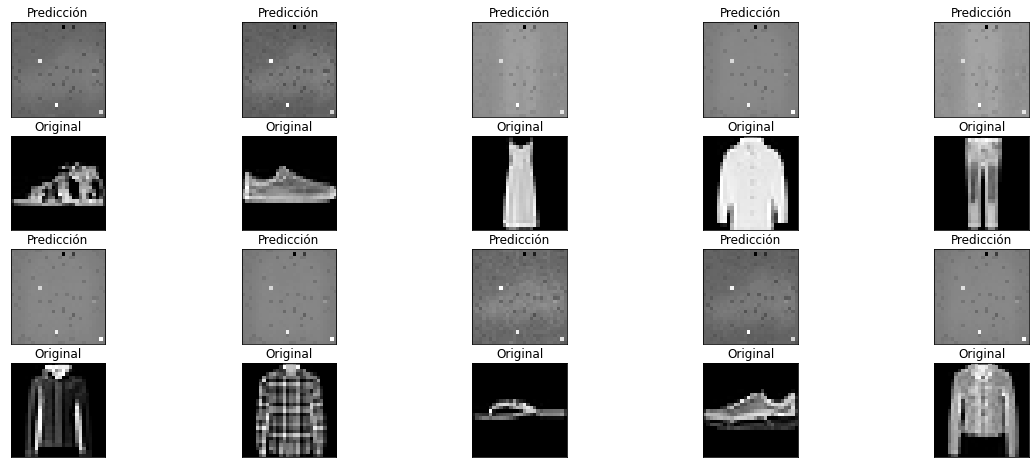

In [48]:
plt.rcParams["figure.figsize"]=[20,8]
ix = 1
for u in range(2):
  for v in range(5):
    ax = plt.subplot(4,5,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Predicción")
    aux = ix + 10
    if u == 1:
        aux = ix-5
    plt.imshow(autoencoder.predict(x_val_vector_scaled)[aux].reshape(28,28), cmap="gray")
    ax = plt.subplot(4,5,ix+5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Original")
    plt.imshow(x_val_vector_scaled[aux].reshape(28,28), cmap="gray")
    ix += 1
  ix+=5
plt.show()

In [49]:
acc_tst = autoencoder.evaluate(x_val_vector_scaled, x_val_vector_scaled, verbose=0)

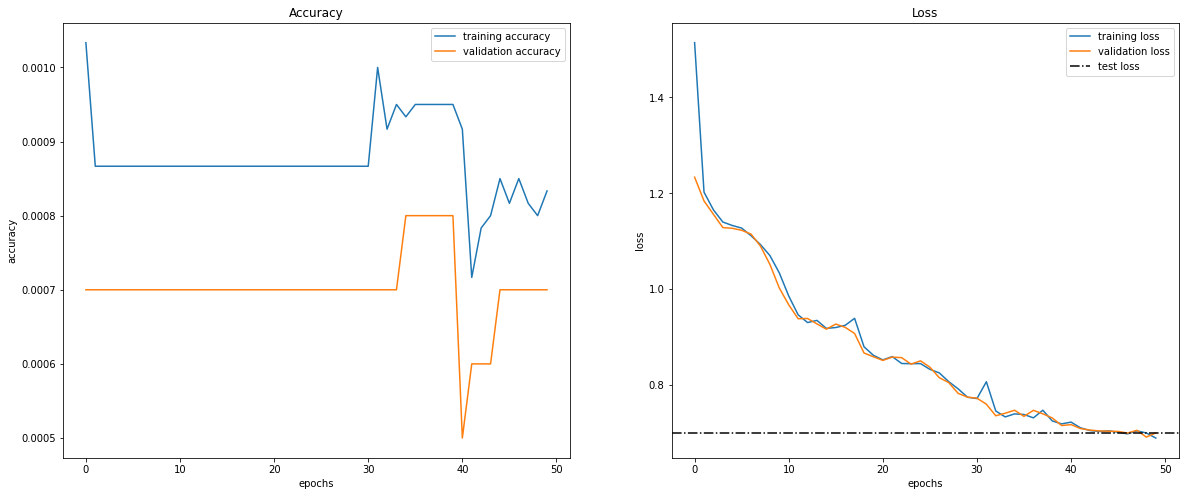

In [50]:
plt.subplot(1,2,1)
plt.plot(history.history["acc"], label = "training accuracy")
plt.plot(history.history["val_acc"], label = "validation accuracy")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy")
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label = "training loss")
plt.plot(history.history["val_loss"], label = "validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss")
plt.axhline(y=acc_tst[0],color="k",linestyle="-.",label="test loss")
plt.legend()
plt.show()

## 3.d) Dimensionalidad

Una forma de interpretar lo que realiza el autoencoder, es considerar que si el autoencoder hace bien su tarea, la información necesaria para reconstruir la imagen original se encuentra en la capa oculta, la cual tiene menor dimensionalidad que la imagen original. Uno puede considerar por lo tanto que la capa de _encoding_ esta comprimiendo la información contenida en la imagen, mientras la capa de _decoding_ hace el proceso contrario, descomprimiendola a su estado original lo mejor posible. 

Explore como cambia el desempeño de la red en cuestión frente a cambios en la dimensión de la capa oculta. Pruebe a lo menos 5 niveles de compresión distintos, incluyendo uno donde la capa oculta tenga $50\%$ de ratio de compresión y otro donde la capa oculta tenga tan solo 2 neuronas. ¿Qué observa?

**Respuesta:** Con 196 neuronas en la capa oculta obtenemos los mejores resultados, tomando en cuenta que con 392 neuronas si bien obtenemos un resultado levemente mejor tenemos el doble de neuronas. 

Observamos ademas que a medida que disminuimos el número de neuronas en la capa oculta, el error aumenta.  El mejor resultado lo obtenemos con la mitad de neuronas, y el peor con dos neurnas.

In [16]:
def graph_results(hists,tsts,titles,fig_size=[10,10], error="MSE error"):
  if len(hists) == 1:
    fig, ax = plt.subplots(1, sharey=True)
    plt.rcParams["figure.figsize"]=fig_size
    ax.set_title(titles[0])
    ax.plot(hists[0]["loss"],"b.",label="Train_loss")
    ax.plot(hists[0]["val_loss"],"r.",label="Val_loss")
    ax.axhline(y=tsts[0],color="k",linestyle="-.",label="Tst_loss")
    ax.set_xlabel("Epochs"),ax.set_ylabel(error)
    #ax.set_xlim([0,10])  # <- Puede convenir insertar como entrada a la función límite inferiores y superiores para ajuste manual
    ax.grid()
    plt.tight_layout()
    plt.show()
    return
  plt.rcParams["figure.figsize"]=fig_size
  fig, axes = plt.subplots(1, len(hists), sharey=True) # sharey to keep the same y lims for all subplots. 
                                            # En algunos casos esto puede jugar en contra para una buena visualización -> ver siguiente comentario
  for i,ax in enumerate(axes):
    ax.set_title(titles[i])
    ax.plot(hists[i]["loss"],"b.",label="Train_loss")
    ax.plot(hists[i]["val_loss"],"r.",label="Val_loss")
    ax.axhline(y=tsts[i],color="k",linestyle="-.",label="Tst_loss")
    ax.set_xlabel("Epochs"),ax.set_ylabel(error)
    #ax.set_xlim([0,10])  # <- Puede convenir insertar como entrada a la función límite inferiores y superiores para ajuste manual
    if i==len(axes)-1: ax.legend()
    ax.grid()
  plt.tight_layout()
  plt.show()

In [17]:
neurons_number = [392, 196, 98, 32, 2]

In [18]:
histories_3d = []
tsts_3d = []
titles_3d = []
for i in neurons_number:
  autoencoder = Sequential()
  
  autoencoder.add(Dense(i,activation='relu')) # encoder
  
  autoencoder.add(Dense(28*28,activation= 'linear')) #decoder
  #autoencoder.compile(optimizer=SGD(lr=0.002),loss='mean_squared_error', metrics=['acc'])
  autoencoder.compile(optimizer=SGD(lr=0.002),loss='binary_crossentropy', metrics=['acc'])
  history = autoencoder.fit(x_tr_vector_scaled,x_tr_vector_scaled,epochs=25,validation_data=(x_val_vector_scaled,x_val_vector_scaled))
  histories_3d.append(history.history)
  titles_3d.append(f'Oculta con {i} neuronas')
  acc_tst = autoencoder.evaluate(x_val_vector_scaled, x_val_vector_scaled, verbose=0)
  tsts_3d.append(acc_tst[0])


Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5438 - acc: 0.0014 - val_loss: 0.9713 - val_acc: 0.0011
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9483 - acc: 0.0011 - val_loss: 1.4057 - val_acc: 0.0031
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9473 - acc: 0.0029 - val_loss: 0.8605 - val_acc: 0.0031
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8284 - acc: 0.0031 - val_loss: 0.7766 - val_acc: 0.0031
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7632 - acc: 0.0030 - val_loss: 0.7454 - val_acc: 0.0031
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7493 - acc: 0.0030 - val_loss: 0.7662 - val_acc: 0.0029
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7529 - acc: 0.0030 - val_loss: 0.7205 - val_acc: 0.0030
Epoch 8/25
1875/1875 [==============================] - 4s 2ms

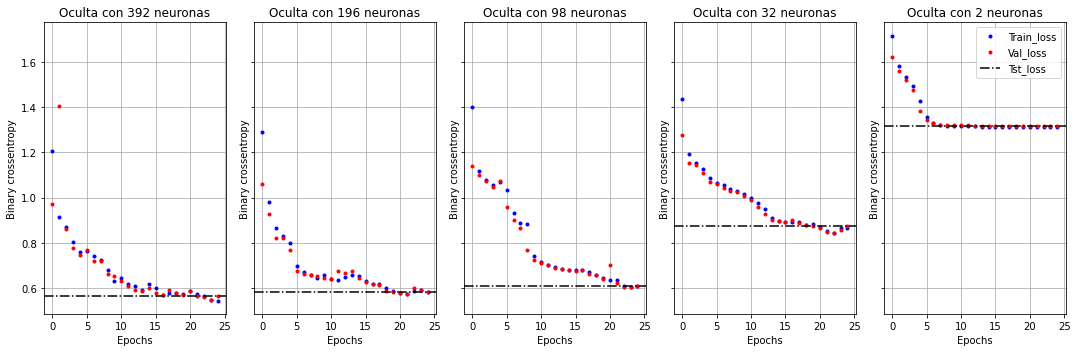

In [19]:
graph_results(histories_3d, tsts_3d, titles_3d, fig_size=[15,5],error="Binary crossentropy")

## 3.e) Deep autoencoder

Pruebe ahora con una arquitectura ligeramente más profunda. Para esto utilice a lo menos 3 capas de encoding, es decir, 3 capas que progresivamente reduzcan la dimensionalidad de la representación hasta una dimensión objetivo inicialmente igual a la mejor obtenida en la pregunta anterior. Utilice igualmente a lo menos 2 capas de decoding, que se encarguen de aumentar la dimensionaliad de la representación hasta alcanzar la dimensión de la imagen original. Note que las primeras capas no necesariamente deben tener menor dimensionalidad que la imagen, la dimensión relevante es aquella de la última capa de encoding. 

Una vez esté satisfecho con su arquitectura profunda, varíe la dimensión objetivo de la última capa de encoding, realizando una exploración similar a la pregunta anterior. Utilice gráficos y muestre algunas imágenes reconstruidas para complementar sus comentarios. 

**Preguntas:**

i) ¿Cómo aumenta el número de parámetros entrenables? ¿Aumenta el tamaño de la representación "comprimida"?  
a. Aumenta considerablemente, debido a la mayor profundidad de la red.  
b. El tamaño de la representación en la última capa de encoding es el mismo que en la arquitectura anterior, 
sin embargo, en este caso la representación será una composición de funciones más compleja, por lo que,
podemos decir que técnicamente "el tamaño de la representación aumenta".

ii) ¿Puede obtener una representación de menor dimensionalidad que la encontrada en el item anterior sin perder calidad en las imagenes obtenidas?

Sí, obtenemos una mejor representación con un autoencoder de tres capas que termina con 192 y 130 neuronas (anteriomente el mejor resultado fue 196 neuronas). El precio 
a pagar por esta mejora es claramente un mayor número de parámetros debido a la representación deep de tres capas. Notamos además que las predicciones ahora
son mucho más abstractas debido a que se han identificado patrones más complejos que permiten identificar los features relevantes de las clases.



In [51]:
histories_3e = []
titles_3e = []
tsts_3e = []

autoencoder_e = Sequential()

autoencoder_e.add(Dense(392,activation='relu')) # encoder 1
autoencoder_e.add(Dense(280,activation='relu')) # encoder 2
autoencoder_e.add(Dense(196,activation='relu')) # encoder 3

autoencoder_e.add(Dense(392,activation= 'linear')) #decoder 1
autoencoder_e.add(Dense(28*28,activation='linear')) #decoder 2
#autoencoder_e.compile(optimizer=SGD(lr=0.002),loss='mean_squared_error', metrics=['acc'])
autoencoder_e.compile(optimizer=SGD(lr=0.002),loss='binary_crossentropy', metrics=['acc'])
history = autoencoder_e.fit(x_tr_vector_scaled,x_tr_vector_scaled,epochs=25,validation_data=(x_val_vector_scaled,x_val_vector_scaled))
histories_3e.append(history.history)
titles_3e.append(f'3 Capas de Encoder hasta 196 neuronas')
acc_tst = autoencoder_e.evaluate(x_val_vector_scaled, x_val_vector_scaled, verbose=0)
tsts_3e.append(acc_tst[0])
autoencoder_e.summary()

Epoch 1/25
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5836 - acc: 0.0022 - val_loss: 1.0621 - val_acc: 1.0000e-04
Epoch 2/25
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0166 - acc: 2.8815e-04 - val_loss: 0.9612 - val_acc: 1.0000e-04
Epoch 3/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9630 - acc: 4.2135e-04 - val_loss: 0.9771 - val_acc: 1.0000e-04
Epoch 4/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9591 - acc: 5.4352e-04 - val_loss: 0.9316 - val_acc: 1.0000e-04
Epoch 5/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9180 - acc: 5.9411e-04 - val_loss: 0.8750 - val_acc: 1.0000e-04
Epoch 6/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8580 - acc: 4.2577e-04 - val_loss: 0.8294 - val_acc: 1.0000e-04
Epoch 7/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8250 - acc: 4.4221e-04 - val_loss: 0.8014 - val_acc: 1.0000e-04
Epoch 8/25

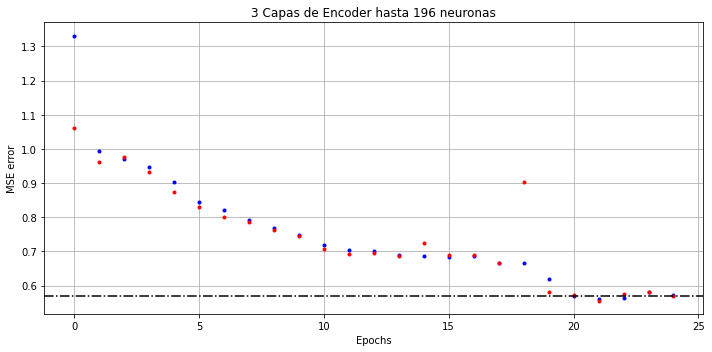

In [53]:
graph_results(histories_3e, tsts_3e, titles_3e,  fig_size=[10,5])

In [22]:
neurons_number_3eb = [192, 130, 60, 25, 5]

In [23]:
histories_3eb = []
titles_3eb = []
tsts_3eb = []

for i in neurons_number_3eb:
  autoencoder_eb = Sequential()
  
  autoencoder_eb.add(Dense(392,activation='relu')) # encoder 1
  autoencoder_eb.add(Dense(280,activation='relu')) # encoder 2
  autoencoder_eb.add(Dense(i,activation='relu')) # encoder 3
  
  autoencoder_eb.add(Dense(392,activation= 'linear')) #decoder 1
  autoencoder_eb.add(Dense(28*28,activation= 'linear')) #decoder 2
  #autoencoder_eb.compile(optimizer=SGD(lr=0.w002),loss='mean_squared_error', metrics=['acc'])
  autoencoder_eb.compile(optimizer=SGD(lr=0.002),loss='binary_crossentropy', metrics=['acc'])
  history = autoencoder_eb.fit(x_tr_vector_scaled,x_tr_vector_scaled,epochs=25,validation_data=(x_val_vector_scaled,x_val_vector_scaled))
  #conv.save_weights(f'3f_weight_3eb{i}.h5')
# load_weights("3f_weights.h5")
  histories_3eb.append(history.history)
  titles_3eb.append(f'Oculta con {i} neuronas')
  acc_tst = autoencoder_eb.evaluate(x_val_vector_scaled, x_val_vector_scaled, verbose=0)
  tsts_3eb.append(acc_tst[0])


Epoch 1/25
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6438 - acc: 7.0713e-04 - val_loss: 1.2303 - val_acc: 4.0000e-04
Epoch 2/25
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2088 - acc: 3.6627e-04 - val_loss: 1.2064 - val_acc: 4.0000e-04
Epoch 3/25
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1859 - acc: 2.6982e-04 - val_loss: 1.1741 - val_acc: 4.0000e-04
Epoch 4/25
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1659 - acc: 2.8361e-04 - val_loss: 1.1824 - val_acc: 0.0000e+00
Epoch 5/25
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1128 - acc: 2.1092e-04 - val_loss: 1.0033 - val_acc: 0.0000e+00
Epoch 6/25
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0002 - acc: 1.6070e-04 - val_loss: 0.9853 - val_acc: 0.0000e+00
Epoch 7/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9654 - acc: 8.7008e-05 - val_loss: 0.9171 - val_acc: 0.0000e+00
Epoch 

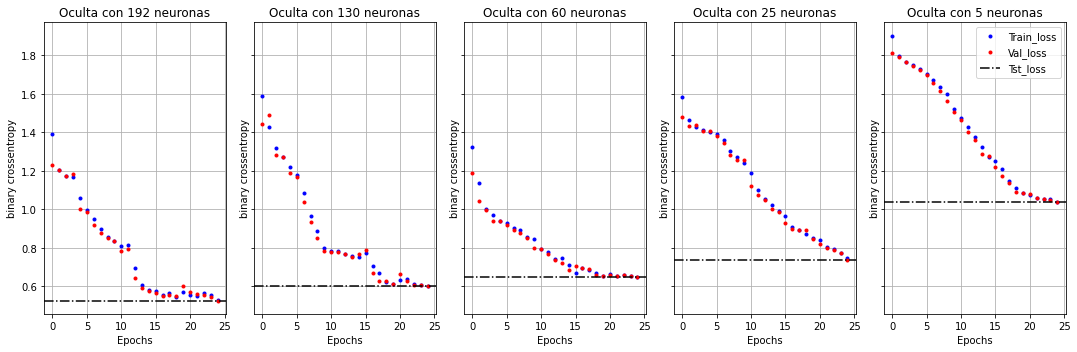

In [40]:
graph_results(histories_3eb, tsts_3eb, titles_3eb, fig_size=[15,5], error="binary crossentropy")

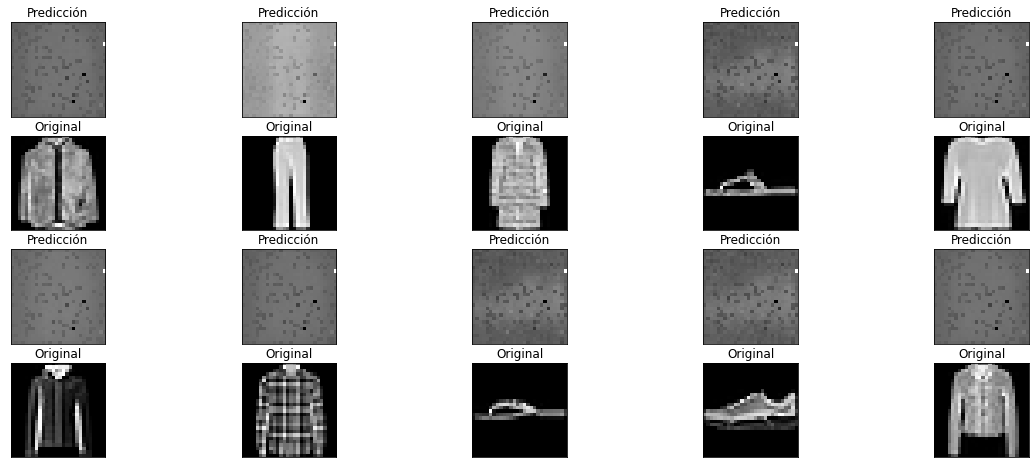

In [54]:
plt.rcParams["figure.figsize"]=[20,8]
ix = 1
for u in range(2):
  for v in range(5):
    ax = plt.subplot(4,5,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Predicción")
    aux = ix + 150
    if u == 1:
        aux = ix-5
    plt.imshow(autoencoder_eb.predict(x_val_vector_scaled)[aux].reshape(28,28), cmap="gray")
    ax = plt.subplot(4,5,ix+5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Original")
    plt.imshow(x_val_vector_scaled[aux].reshape(28,28), cmap="gray")
    ix += 1
  ix+=5
plt.show()

## 3.f) Convolutional Autoencoder

Como hemos hasta ahora  utilizado una arquitectura fully connected, nuestra red no toma en cuenta la infomación local contenida en la proximidad de un pixel en la imagen. Como vimos en la tarea anterior, esta información podría ser crucial al momento de procesar imágenes. 

En este item deberá implementar un autoencoder convolucional. La sección de encoding de la red se creará de igual manera que las redes convolucionales creadas en la tarea 1. Puede utilizar capas de Max Pooling o Strides mayores a 1 para reducir la dimensionalidad en esta etapa. Tenga en mente como varía la dimensión de la imagen a lo largo del proceso. 

Para luego recuperar la dimensionalidad de la imagen original debemos utilizar una capa llamada usualmente como "Deconvolution Layer". Esta capa realiza el proceso inverso que aquel realizado por una capa convolucional, por lo cual utilizando por ejemplo `stride=2` puede duplicar la dimensionalidad de su input. 

Puede realizar la profundidad que desee, pero tome en cuenta que una mayor profundidad de la sección convolucional permite a la red reducir dimensionalidad más lentamente, sin "forzar" la compresión de las características. Note que para reconstruir la dimensión original puede usar `output_padding` para corregir problemas de paridad, entre otros. 

Puede igualmente optar por usar algun número de capas densas en el cuello de botella del autoencoder, usando al comienzo de esta una capa `Flatten` y al final de ella una capa `Reshape` (`keras.layers.Reshape(target_shape)`) para recuperar la bidimensionalidad.

¡No olvide que para entrenar esta red debe usar la versión bidimensional de los datos escalados!

Visualice que tan bien se comporta la convolución, en terminos de la función de pérdida y visualizando las imagenes reconstruidas. Compárese con la red densa. 

**Respuesta:** Obtenemos un modelo con un errores muy bajos en comparación al modelo implementado con capas densas, además nuestra representación latente
termina en una imagen de dimensiones de (7,7). Las representaciones del autoencoder convolucional logran
capturar algunos detalles de las clases además de las siluetas, un claro ejemplo de esto es la representación de algunas sandalias, donde se logra una diferenciación respecto a la 
representación de las zapatillas con algunos pixeles en negro al medio de la silueta.

In [26]:
x_tr_scaled = x_tr_scaled.reshape(-1,28,28,1)
x_val_scaled = x_val_scaled.reshape(-1,28,28,1)


In [27]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Flatten, Conv2DTranspose, Reshape, Input
from keras.layers import Dense
from keras.optimizers import SGD
from keras.models import Sequential
conv=Sequential()
#E
conv.add(Input(shape=(28,28,1)))
conv.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu',input_shape=(28,28,1)))
conv.add(MaxPooling2D(pool_size=(2,2)))
conv.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu',input_shape=(14,14,1)))
conv.add(MaxPooling2D(pool_size=(2,2)))

conv.add(Flatten())
conv.add(Dense(20,activation='relu'))
conv.add(Dense(49,activation='relu'))
conv.add(Reshape((7,7,-1)))

#D
conv.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu',input_shape=(7,7,1)))
conv.add(UpSampling2D((2, 2)))
conv.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu',input_shape=(14,14,1)))
conv.add(UpSampling2D((2, 2)))
conv.add(Conv2D(filters=1, kernel_size=(3,3), padding='same', activation='sigmoid',input_shape=(28,28,1)))
#conv.add(Reshape((28,28)))

conv.compile(optimizer=SGD(lr=0.002),loss='binary_crossentropy', metrics=['acc'])
conv.summary()
#load_weights("3f_weights.h5")
history = conv.fit(x_tr_scaled,x_tr_scaled,epochs=25,validation_data=(x_val_scaled,x_val_scaled))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 392)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 20)                7860      
_________________________________________________________________
dense_43 (Dense)             (None, 49)              

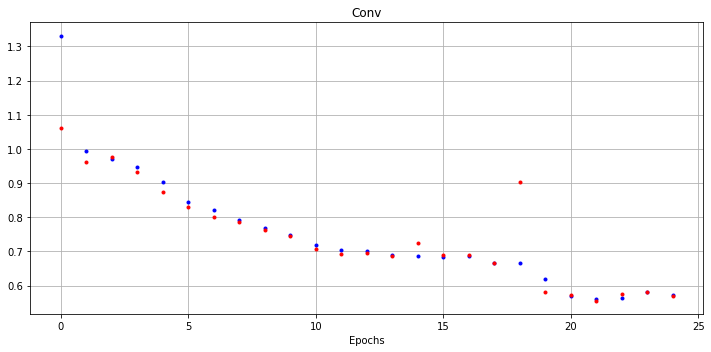

In [56]:
fig, ax = plt.subplots(1, sharey=True)
plt.rcParams["figure.figsize"]=[7,5]
ax.set_title("Conv")
ax.plot(history.history["loss"],"b.",label="Train_loss")
ax.plot(history.history["val_loss"],"r.",label="Val_loss")
ax.set_xlabel("Epochs"),ax.set_ylabel("")
#ax.set_xlim([0,10])  # <- Puede convenir insertar como entrada a la función límite inferiores y superiores para ajuste manual
ax.grid()
plt.tight_layout()
plt.show()

In [29]:
#conv.save_weights('3f_weights.h5')
# load_weights("3f_weights.h5")

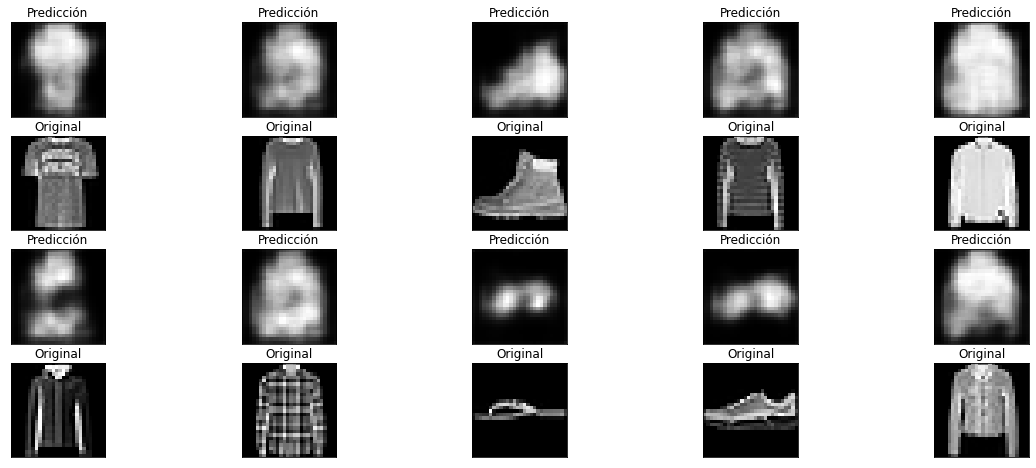

In [30]:
plt.rcParams["figure.figsize"]=[20,8]
ix = 1
for u in range(2):
  for v in range(5):
    ax = plt.subplot(4,5,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Predicción")
    aux = ix + 200
    if u == 1:
        aux = ix-5
    plt.imshow(conv.predict(x_val_scaled)[aux].reshape(28,28), cmap="gray")
    ax = plt.subplot(4,5,ix+5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Original")
    plt.imshow(x_val_scaled[aux].reshape(28,28), cmap="gray")
    ix += 1
  ix+=5
plt.show()

## 3.g) Denoising Autoencoder 

Otra utilidad que se le ha dado a los autoencoders es la posibilidad de utilizarlos para separar ruido de información. Para entrenar tal tipo de modelo, la idea es simple: utilizar como datos de entrada imagenes a las cuales se les ha agregado artificialmente ruido y como objetivo la imagen original sin ruido. 

Entrene alguna arquitectura de autoencoder que le parezca apropiada para la tarea utilizando algún tipo de ruido aleatorio. Puede utilizar cambios en valores de pixeles aleatoriamente, o por ejemplo "promediar" ponderadamente la imagen original con alguna otra imagen del dataset ligeramente modificada. Puede utilizar las librerías `random` de `numpy`. Sea creativo, puede crear el ruido que desee. Idealmente, considerando la naturaleza del problema que se buscaría modelar (eliminar ruido real de mediciones), la naturaleza del ruido agregado debe ser estocástica y no puede "repetirse" el mismo patrón de ruido a lo largo de todo el entrenamiendo, es decir, si agregó un ruido estocástico a cada imágen del conjunto, este proceso debe iterarse igualmente luego de cada época de entrenamiento, para evitar que la red aprenda un patrón especifico de ruido, si no aprenda realmente a diferenciar ruido sin información de la información suyaciente a la imagen. 

Una vez esté satisfecho con la red, muestre ejemplos de la imagen con ruido, la imagen original y la imagen reconstruida. Pruebe igualmente entregarle a la red nuevas.

In [74]:
import numpy as np
# aplicacion ruido
noise_factor = 0.5
x_tr_noisy = x_tr_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_tr_scaled.shape) 
x_val_noisy = x_val_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_val_scaled.shape) 

x_tr_noisy = np.clip(x_tr_noisy, 0., 1.)
x_val_noisy = np.clip(x_val_noisy, 0., 1.)

print("a")
# autoencoder.fit(x_tr_noise,x_tr,epochs=50,validation_data=(x_val_noise,x_val))

a


In [75]:
import keras
from keras import layers
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Input
from keras.optimizers import SGD
from keras.models import Sequential

In [76]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [77]:
autoencoder.fit(x_tr_noisy, x_tr_scaled,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_val_noisy, x_val_scaled))

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.3898 - val_loss: 0.3111
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3065 - val_loss: 0.3051
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3020 - val_loss: 0.3024
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3000 - val_loss: 0.3004
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2977 - val_loss: 0.2986


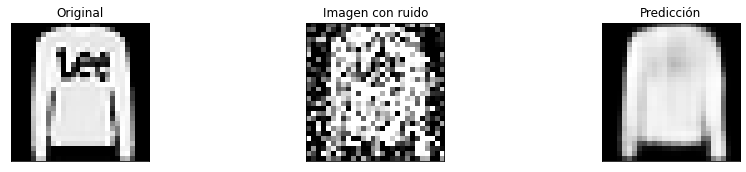

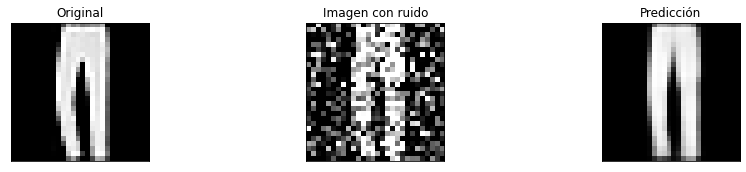

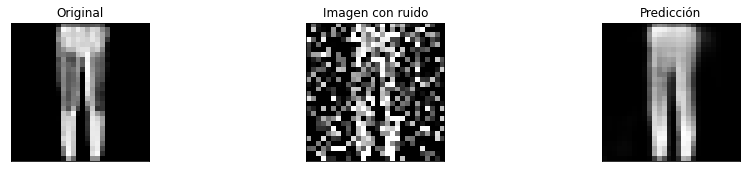

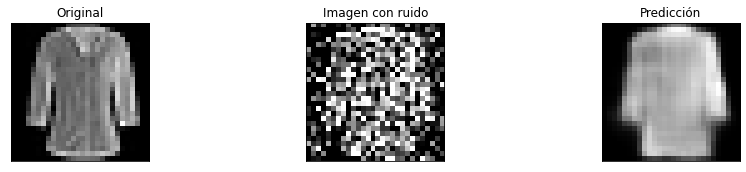

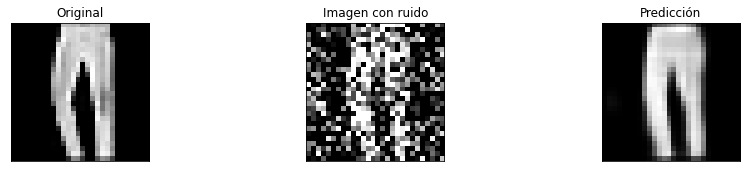

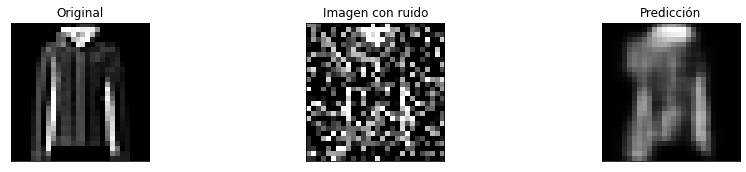

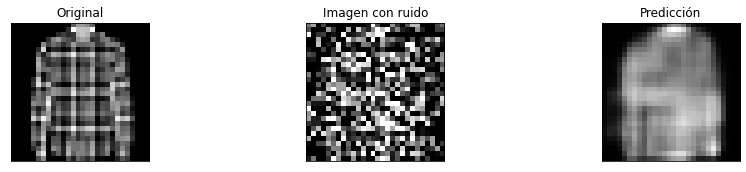

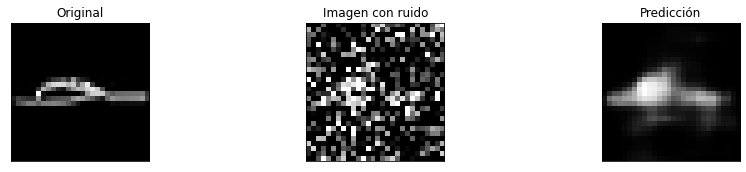

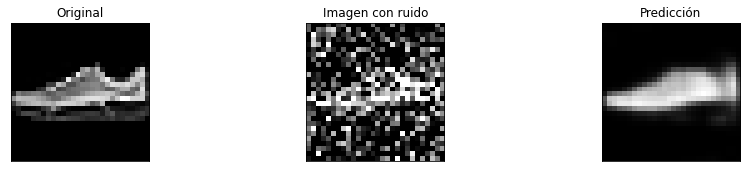

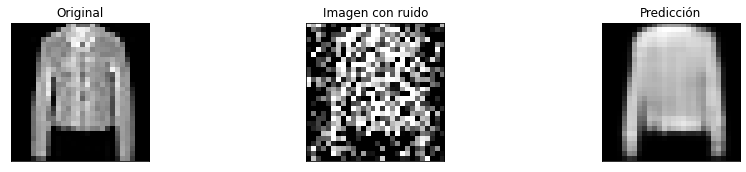

In [79]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=[15,30]
ix = 1
for u in range(1,31,3):
  ax = plt.subplot(10,3,u)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title("Original")
  plt.imshow(x_val_scaled[ix].reshape(28,28), cmap="gray")
  ax = plt.subplot(10,3,u+1)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title("Imagen con ruido")
  plt.imshow(x_val_noisy[ix].reshape(28,28), cmap="gray")
  ax = plt.subplot(10,3,u+2)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title("Predicción")
  plt.imshow(autoencoder.predict(x_val_noisy)[ix].reshape(28,28), cmap="gray")
  
  ix += 1
  plt.show()

## 3.h) Generación de imágenes

Otra utilización posible que podría darse, quizás, a los autoencoders, es utilizar los decoders para generar nuevas imágenes. La idea de esto sería considerar que la habilidad que tiene la sección decoder de generar una imágen a partir de una representación de menor dimensionalidad puede aprovecharse. 

Para esto, extraiga la sección de encoding y la sección de decoding de alguno de los autoencoders entrenados que prefiera. Obtenga los valores de la representación interna de las imágenes usando el encoder para calcularlos. Luego agréguele a esta representación algún ruido de su preferencia, y calcule la imágen resultante utilizando el decoder. ¿Qué observa? Muestre las imágenes obtenidas junto con otras imágenes de la misma categoría que la imágen que utilizó originalmente. Pruebe con distintos valores de ruido.   
  
**Respuesta:** 
Al aumentar el ruido considerablemente, el decoder no logra reconstruir la imagen de entrada. Con valores de ruido pequeños, del orden de 10^-1 o menor el decoder consigue reconstruir correctamente la imagen, esto es útil para casos reales, ya que, los aparatos de medición modernos tienen pequeñas desviaciones que el decoder podría aprender a limpiar. Además, se destaca que el decoder logra generar correctamente la silueta la mayoría de las veces, abstrayéndose de los detalles de diseño de cada prenda.

Pruebe también, por ejemplo, calcular la imágen obtenida al promediar las representaciones comprimidas de varias (o todas) las imágenes de una clase. Utilice el encoder para generar imágenes a partir de otros valores que se les ocurran y especule sobre el por qué la imágen obtenida se asimila o no a las imágenes del dataset.  
  
**Respuesta:** Al utilizar la función max con pocas imágenes del data set para generar una nueva imagen el decoder logra generar correctamente la silueta de la prenda, sin embargo, si aumentamos la cantidad de imágenes de las que tomaremos el max, entonces el decoder no logra generar ninguna prenda similar al dataset, esto podría deberse a que, por ejemplo, un pantalón podría estar ubicado en distintas partes para cada imagen, cuando comenzamos a tomar el máximo de cada pixel de todas las imágenes, se comienza a crear un objeto más grande y difuso, ya que, está sumando los pixeles de todas las imágenes al generar la imagen ficticia.

In [36]:
def get_n_layers(max_layer, original_model):
  truncated_model = Sequential()
  for layer in range(max_layer): #first is the input
    truncated_model.add(original_model.get_layer(index=layer))
  #truncated_model.summary()
  return truncated_model

In [37]:
from keras.models import load_model
autoencoder = Sequential()
autoencoder.add(Dense(32,activation='relu',input_shape=(784,))) # encoder
autoencoder.add(Dense(28*28,activation= 'linear')) #decoder
#autoencoder.compile(optimizer=SGD(lr=0.002),loss='mean_squared_error', metrics=['acc'])
#autoencoder.built = True
autoencoder.load_weights("autoencoder3c.h5")
#autoencoder.compile(optimizer=SGD(lr=0.002),loss='binary_crossentropy', metrics=['acc'])
#history = autoencoder.fit(x_tr_vector_scaled,x_tr_vector_scaled,epochs=50,validation_data=(x_val_vector_scaled,x_val_vector_scaled))

In [41]:
import tensorflow as tf
#@keras_export('keras.layers.GaussianNoise')
class GaussianNoise2(tf.keras.Model):
  def __init__(self, stddev, **kwargs):
    super(GaussianNoise2, self).__init__(**kwargs)
    #self.supports_masking = True
    self.stddev = stddev

  def call(self, inputs):
        noise_x = inputs + K.random_normal(shape=K.shape(inputs),
                                          mean=0.,
                                          stddev=np.random.uniform(0.0, self.stddev))
        return noise_x
  

In [57]:
from keras.layers import GaussianNoise
from keras import backend as K
encoder = get_n_layers(1,autoencoder)
decoder = autoencoder.get_layer(index=1)
autoencoder_noise = get_n_layers(1,autoencoder)
autoencoder_noise.add(GaussianNoise2(stddev=0.1))
autoencoder_noise.add(decoder)
autoencoder_noise.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_noise.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 32)                25120     
_________________________________________________________________
gaussian_noise2_1 (GaussianN (None, 32)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


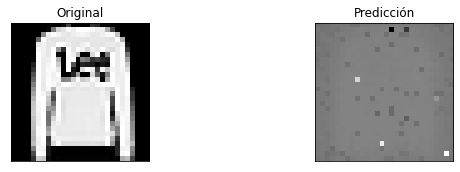

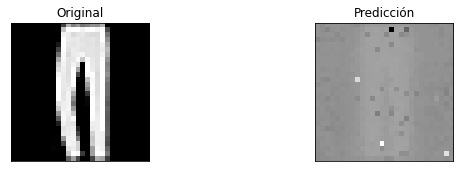

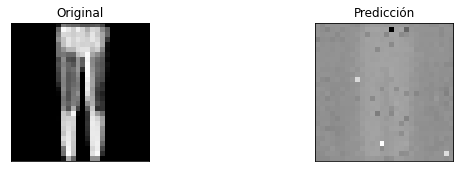

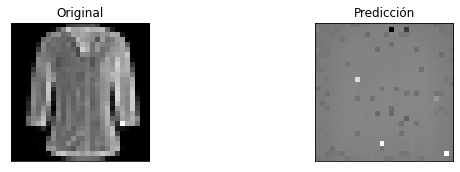

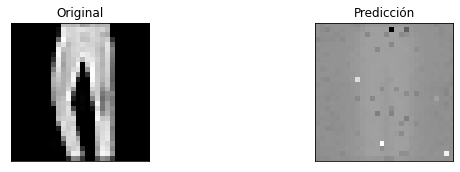

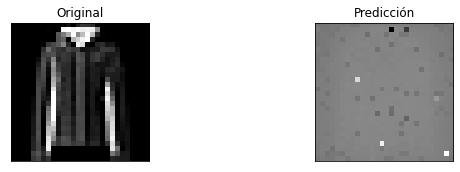

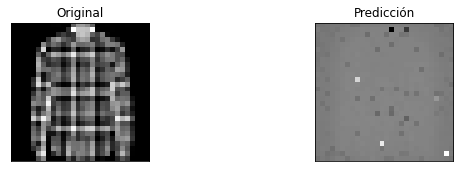

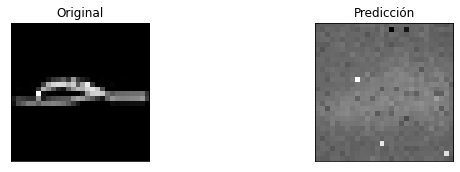

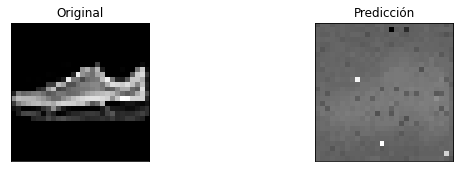

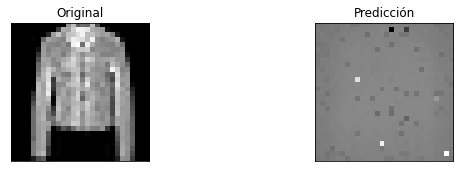

In [81]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=[10,30]
ix = 1
for u in range(1,21,2):
  ax = plt.subplot(10,2,u)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title("Original")
  plt.imshow(x_val_scaled[ix].reshape(28,28), cmap="gray")
  #plt.imshow(encoder.predict(x_val_vector_scaled)[ix].reshape(28,28), cmap="gray")
  ax = plt.subplot(10,2,u+1)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title("Predicción")
  plt.imshow(autoencoder_noise.predict(x_val_vector_scaled)[ix].reshape(28,28), cmap="gray")
 
  ix += 1
  plt.show()

In [59]:
import tensorflow as tf
aux = tf.keras.initializers.RandomNormal(
    mean=0.0, stddev=0.6, seed=None
)
print(type(aux))
values = aux(shape=(4, 4))
print(values)

<class 'tensorflow.python.keras.initializers.initializers_v2.RandomNormal'>
tf.Tensor(
[[ 0.36551982  0.27544475 -0.25134093  0.35443264]
 [ 0.7273568  -0.24807595  0.140076   -0.01257045]
 [ 0.09576144  0.0313448  -0.5113018  -0.5597901 ]
 [ 0.05061873 -0.6625487   0.6696677  -0.01719126]], shape=(4, 4), dtype=float32)


In [60]:
encoder.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [61]:
label = x_tr_vector_scaled[np.where(y_tr==1)]
label = label[20:60]
#plt.imshow(label[3].reshape(28,28), cmap="gray")
images = []
for i in range(len(label)):
  #print(i.shape)
  images.append(encoder.predict(label)[i])

images = np.asarray(images)

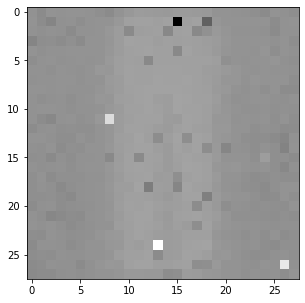

In [63]:
final_model = Sequential()
final_model.add(decoder)
#numpy.reshape(a, -1)

final_image = np.mean(images,axis=0)
final_prediction = final_model.predict(final_image.reshape(-1, 32))

plt.figure(figsize = (20,5))
plt.imshow(final_prediction.reshape(28,28), cmap="gray")

## Utilizaremos el valor máximo para cada pixel entre todas las imágenes

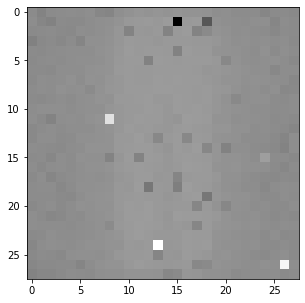

In [66]:
from scipy.stats import gmean, hmean, mode, tmax

final_image = np.max(images,axis=0)
final_prediction = final_model.predict(final_image.reshape(-1, 32))

plt.figure(figsize = (20,5))
plt.imshow(final_prediction.reshape(28,28), cmap="gray")